# Quora Question Pairs Competition on Kaggle
### Link to the competition:
https://www.kaggle.com/c/quora-question-pairs/overview
### Competition Description:
**The goal of this competition is to predict which of the provided pairs of questions contain two questions with the same meaning.**

The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

Please note: as an anti-cheating measure, Kaggle has supplemented the test set with computer-generated question pairs. Those rows do not come from Quora, and are not counted in the scoring. All of the questions in the training set are genuine examples from Quora.

Data fields
id - the id of a training set question pair
qid1, qid2 - unique ids of each question (only available in train.csv)
question1, question2 - the full text of each question
is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

### Link to the dataset

https://www.kaggle.com/c/quora-question-pairs/data

In [2]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import zipfile

In [8]:
df_train =  pd.read_csv('../input/quora-question-pairs/train.csv.zip')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
df_train_copy = df_train.copy()

Data Fields:

**`id:`** simple rowID  
**`qid1 and qid2:`** Unique identifier for each questions  
**`question1 and question2:`** Question contents  
**`is_duplicate:`** Target Variable  

In [11]:
# Exploratory Data Analysis

#Number of question pairs
#Number of duplicate pairs
#Number of repeating and unique questions

qid = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())

print(f'The total number of question pairs in the training set: {len(df_train)}')
print(f"Duplicate Pairs: {sum(df_train['is_duplicate'])}")
print(f"Number of unique questions: {df_train['qid1'].append(df_train['qid2']).nunique()}")
#print(f"Number of repeating questions: {len(df_train['qid1'].append(df_train['qid2'])) - df_train['qid1'].append(df_train['qid2']).nunique()}")

print(f'Number of repeating questions: {np.sum(qid.value_counts() > 1)}')


# Plotting the histogram of number repeating questions



The total number of question pairs in the training set: 404290
Duplicate Pairs: 149263
Number of unique questions: 537933
Number of repeating questions: 111780


In [12]:
qid.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64

Text(0, 0.5, 'Number of Questions')

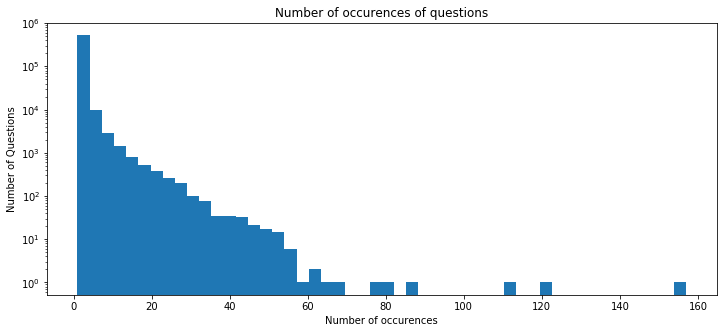

In [13]:
# plotting the histogram

plt.figure(figsize =  (12,5))

plt.hist(qid.value_counts(), bins = 50)
plt.yscale('log')
plt.title('Number of occurences of questions')
plt.xlabel('Number of occurences')
plt.ylabel('Number of Questions')

# Test Submission


In [14]:
from sklearn.metrics import log_loss

In [15]:
p = df_train['is_duplicate'].mean()
print('predicted score:', log_loss(y_true= df_train['is_duplicate'], y_pred =  np.zeros(len(df_train['is_duplicate'])) + p))

predicted score: 0.6585273839844354


In [16]:
# Submission

df_test = pd.read_csv('../input/quora-question-pairs/test.csv')

In [17]:
df_train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [18]:
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [19]:
submission = df_test.copy()

In [20]:
submission['is_duplicate'] = p

In [21]:
submission.drop(['question1','question2'],axis =1, inplace = True)

In [22]:
submission.reset_index(drop = True)

,test_id,is_duplicate
0,0,0.369198
1,1,0.369198
2,2,0.369198
3,3,0.369198
4,4,0.369198
...,...,...
2345791,2345791,0.369198
2345792,2345792,0.369198
2345793,2345793,0.369198
2345794,2345794,0.369198


In [23]:
submission.head()

,test_id,is_duplicate
0,0,0.369198
1,1,0.369198
2,2,0.369198
3,3,0.369198
4,4,0.369198


In [24]:
#submission.to_csv('baseline.csv',index = False)

Leaderboard score - 0.55  
Predicted score - 0.65

# Text Analysis

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


# Missing Values

In [26]:
df_train[df_train['question1'].isna() | df_train['question2'].isna()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [27]:
df_train.dropna(inplace = True)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
id              404287 non-null int64
qid1            404287 non-null int64
qid2            404287 non-null int64
question1       404287 non-null object
question2       404287 non-null object
is_duplicate    404287 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [29]:
df_train['question1_len'] = df_train['question1'].apply(len)
df_train['question2_len'] = df_train['question2'].apply(len)

In [30]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [31]:
# plt.figure(figsize = (15,10));
# plt.hist(df_train['question1_len'], bins = 200, range = [0,200]);

In [32]:
# plt.figure(figsize = (15,10));
# plt.hist(df_train['question2_len'], bins = 200, range = [0,200]);

In [33]:
#plotting it again with extra details
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)



/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


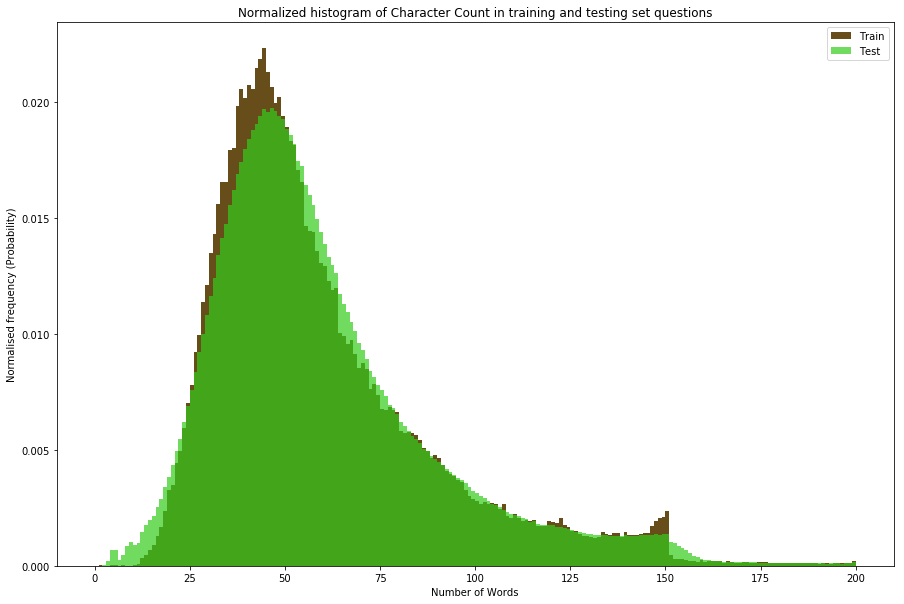

In [42]:
#Histogram

plt.figure (figsize = (15,10));

plt.hist(dist_train, bins = 200, range = [0,200], color = [0.4, 0.3, 0.1], label = 'Train', normed = True);
plt.hist(dist_test, bins = 200, range = [0,200], color = [0.2,0.8,0.1], label = 'Test',normed = True, alpha = 0.7);

plt.title('Normalized histogram of Character Count in training and testing set questions');
plt.xlabel('Number of Words');
plt.ylabel('Normalised frequency (Probability)');
plt.legend()


In [35]:
len('djnfjdfj jnsndjsfn')
len('jdjf jnvjn'.split(' '))

2

In [36]:
train_word = train_qs.apply(lambda x: x.split(' '))
test_word = test_qs.apply(lambda x : x.split(' '))
n_word_train = train_word.apply(len)
n_word_test = test_word.apply(len)

Text(0, 0.5, 'Normalized frequency (Probability)')

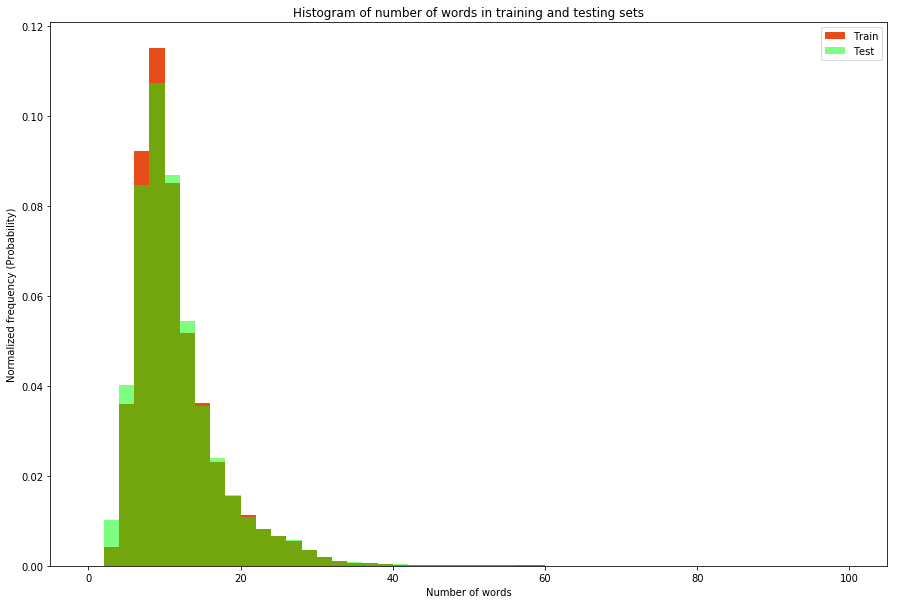

In [39]:
# Plotting Histogram of word count

plt.figure(figsize = (15,10))

plt.hist(n_word_train, bins = 50, range = [0,100], color = [0.9,0.3,0.1],density = True, label = 'Train');
plt.hist(n_word_test, bins = 50, range = [0,100], color = [0.0,1,0], density = True, alpha = 0.5, label = 'Test' );

plt.legend()
plt.title('Histogram of number of words in training and testing sets')
plt.xlabel('Number of words')
plt.ylabel('Normalized frequency (Probability)')

Distribution for both training and testing set is almost same. Let's look at the most common words.

In [43]:
duplicate = df_train.groupby('is_duplicate')
duplicate[['question1_len','question2_len']].mean()


,question1_len,question2_len
is_duplicate,,
0,63.455894,64.304787
1,52.841347,52.938933


In [44]:
df_train['question1_word'] = df_train['question1'].apply(lambda x : len(x.split(' ')))
df_train['question2_word'] = df_train['question2'].apply(lambda x : len(x.split(' ')))

In [45]:
duplicate[['question1_word','question2_word']].mean()

,question1_word,question2_word
is_duplicate,,
0,11.585972,11.959831
1,9.848884,9.861553


From the above two averages, we can conclude that number of words and number of characters are lesser in the duplicate pairs

In [46]:
# Word Cloud

# from wordcloud import WordCloud

# word_cloud = WordCloud(width = 800, height = 400, max_words = 250, background_color= 'White', colormap = 'Blues').generate(" ".join(train_qs.astype(str)))


In [47]:
# plt.figure(figsize = (25,20))

# plt.imshow(word_cloud)

# Steps of NLP:

For finding the matches between both the questions we will have to create a suitable feature.

Our first feature is going to be word-match-share.

1. Initial Feature Analysis

1. training set - question 1  
for a row - i will find the total number of unique words:
1. i will find the exact common words ratio (after removing stopwords)
2. I will find the common lemma or roots
3. In both the cases, the distribution of duplicate will be plotted

Steps:
1. remove punctuation
2. make them small letters
3. remove stopwords
4. stemming

### First Step:
For finding the duplicate questions, we will check the ratio of similar lemma to the total number of unique lemma after removing the stopwords.
Few transformations will be applied to each questions:
1. Normalization
    * Lowercase
    * Punctuation removal
2. Tokenization
3. Stopwords Removal
4. Lemmatization

### Second Step:
After these steps we can attach parts of speec tag to each word in both the questions. In the first step we checked the ratio of similar lemma based only on its face value. In the second step (the modification), we will check the similar words ratio on the basis of the lemma as well as the POS tag attached to it.

In [48]:
question1 = df_train['question1']
question2 = df_train['question2']

In [49]:
# removing punctuation and converting to lower case
import string

In [50]:
question1 = question1.apply((lambda x: (''.join(c for c in x if c not in string.punctuation)).lower()))
question2 = question2.apply((lambda x: (''.join(c for c in x if c not in string.punctuation)).lower()))

In [51]:
# Tokenization:
from nltk.tokenize import word_tokenize

In [52]:
import time

In [53]:
start  = time.time()
question1 = question1.apply(lambda x: word_tokenize(x))
end = time.time()
print(f'time taken = {start - end}')

time taken = -86.20033025741577


In [ ]:
# start  = time.time()
# question1_map =pd.Series(list(map(word_tokenize,question1)))
# end = time.time()
# print(f'time taken = {start - end}')

In [54]:
# Stopwords removal
from nltk.corpus import stopwords

In [55]:
 question1_stopwords = question1.apply(lambda x: (c for c in x if c not in stopwords.words('english')))

In [57]:
question1_stopwords = list(map(lambda x: [word for word in x if word not in stopwords.words('english')], question1))

In [ ]:
question2_stopwords = list(map(lambda x: [word for word in x if word not in stopwords.words('english')], question2))

In [ ]:
# Lemmatization
from nltk import pos_tag
# Due to the amount of data, pos tagging is taking a long time. So we are skipping it for now

In [ ]:
# question1_pos = question1_stopwords.apply(lambda x : pos_tag(x))

In [ ]:
# question2_pos = question2_stopwords.apply(lambda x : pos_tag(x))

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmer = PorterStemmer()


In [ ]:
list(map(stemmer.stem, ))